<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-22 13:59:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  68.3MB/s    in 3.0s    

2025-04-22 13:59:29 (68.3 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


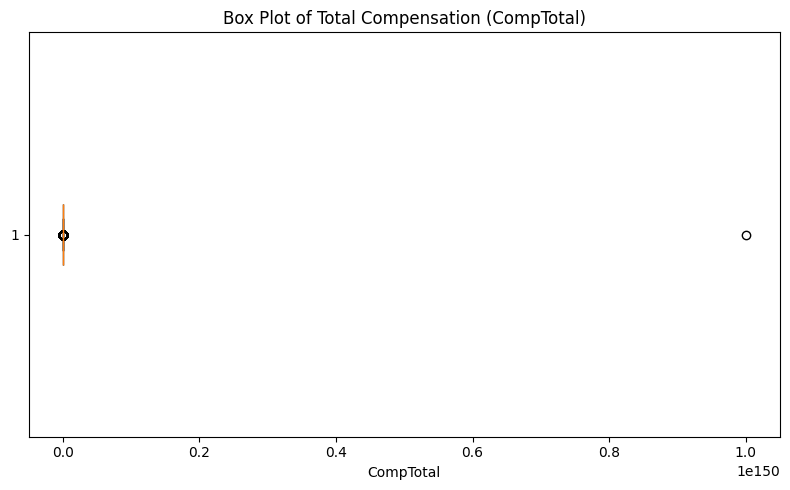

In [11]:
# your code goes here
# Task 1.1: Box plot of CompTotal
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 5))
plt.boxplot(df['CompTotal'], vert=False, patch_artist=True, boxprops=dict(facecolor='lavender'))
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


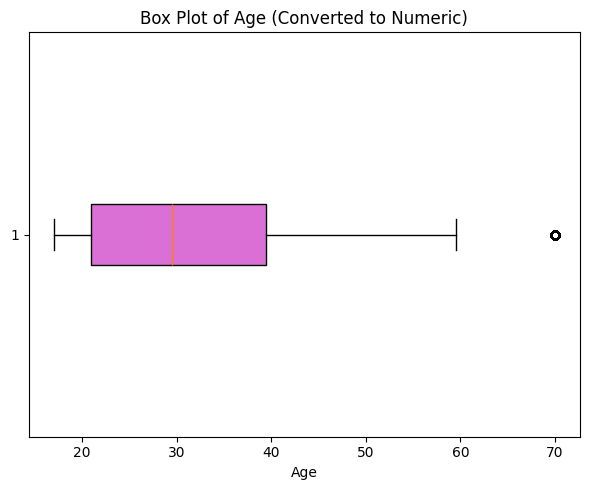

In [12]:
# your code goes here
# Convert Age to numeric and plot boxplot
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Create a mapping from age category to mean age
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNum'] = df['Age'].map(age_map)
df = df.dropna()

plt.figure(figsize=(6, 5))
plt.boxplot(df['AgeNum'], vert=False, patch_artist=True, boxprops=dict(facecolor='orchid'))
plt.title('Box Plot of Age (Converted to Numeric)')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1000x600 with 0 Axes>

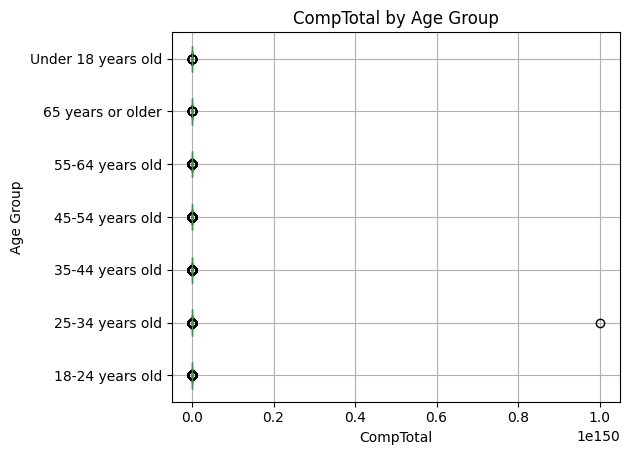

In [13]:
# your code goes here
#  Box plot of CompTotal by Age Group
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Remove invalid age groups
valid_ages = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
              '45-54 years old', '55-64 years old', '65 years or older']
df = df[df['Age'].isin(valid_ages)]

# Box plot grouped by Age
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='Age', vert=False, patch_artist=True)
plt.title('CompTotal by Age Group')
plt.suptitle('')
plt.xlabel('CompTotal')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x5600 with 0 Axes>

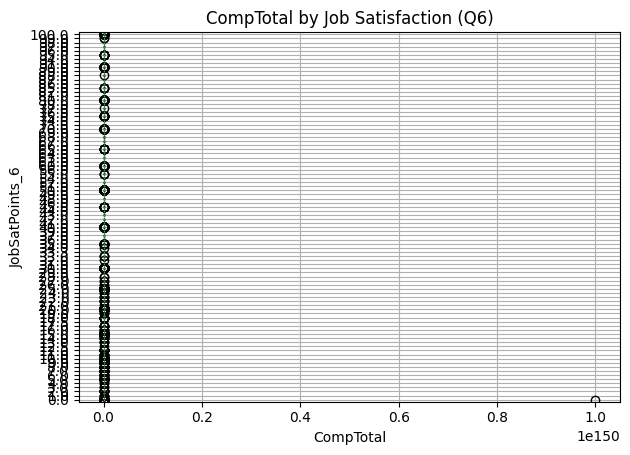

In [16]:
# your code goes here
# Task 2.2: Box plot of CompTotal by JobSatPoints_6
query = "SELECT JobSatPoints_6, CompTotal FROM main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 56))
df.boxplot(column='CompTotal', by='JobSatPoints_6', vert=False, patch_artist=True)
plt.title('CompTotal by Job Satisfaction (Q6)')
plt.suptitle('')
plt.xlabel('CompTotal')
plt.ylabel('JobSatPoints_6')
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x600 with 0 Axes>

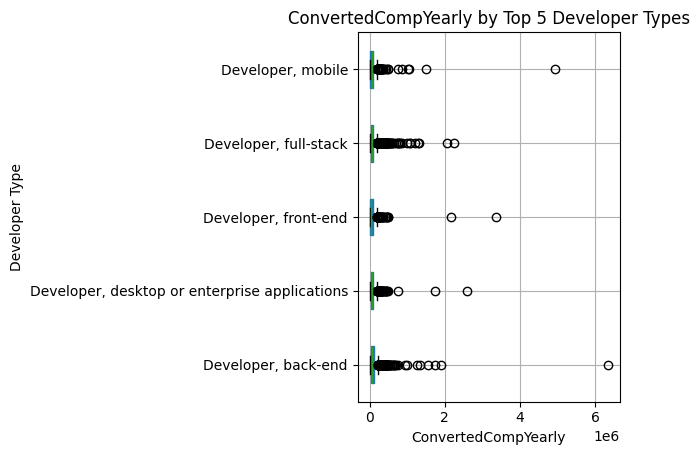

In [17]:
# your code goes here
# Task 3.1: Box plot for ConvertedCompYearly by top 5 DevType
query = "SELECT DevType, ConvertedCompYearly FROM main WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Split and flatten the DevType column
devs = df['DevType'].str.split(';')
flat_list = [item.strip() for sublist in devs.dropna() for item in sublist]
top5_devs = pd.Series(flat_list).value_counts().nlargest(5).index.tolist()

# Create one-hot encoded rows for each DevType
rows = []
for _, row in df.iterrows():
    dev_types = [d.strip() for d in str(row['DevType']).split(';')]
    for dev in dev_types:
        if dev in top5_devs:
            rows.append({'DevType': dev, 'ConvertedCompYearly': row['ConvertedCompYearly']})

df_top5 = pd.DataFrame(rows)

plt.figure(figsize=(10, 6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', vert=False, patch_artist=True)
plt.title('ConvertedCompYearly by Top 5 Developer Types')
plt.suptitle('')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Developer Type')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x600 with 0 Axes>

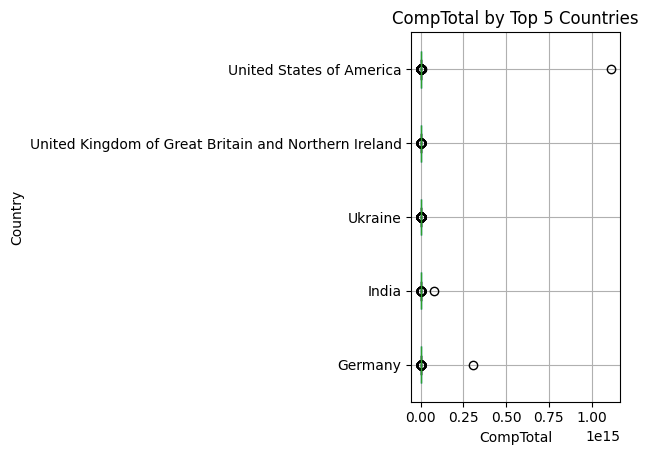

In [18]:
# your code goes here
# Task 3.2: Box plot of CompTotal for top 5 countries
query = "SELECT Country, CompTotal FROM main WHERE Country IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Get top 5 countries by frequency
top5_countries = df['Country'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['Country'].isin(top5_countries)]

plt.figure(figsize=(10, 6))
df_top5.boxplot(column='CompTotal', by='Country', vert=False, patch_artist=True)
plt.title('CompTotal by Top 5 Countries')
plt.suptitle('')
plt.xlabel('CompTotal')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_347/3766967608.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


<Figure size 1200x3800 with 0 Axes>

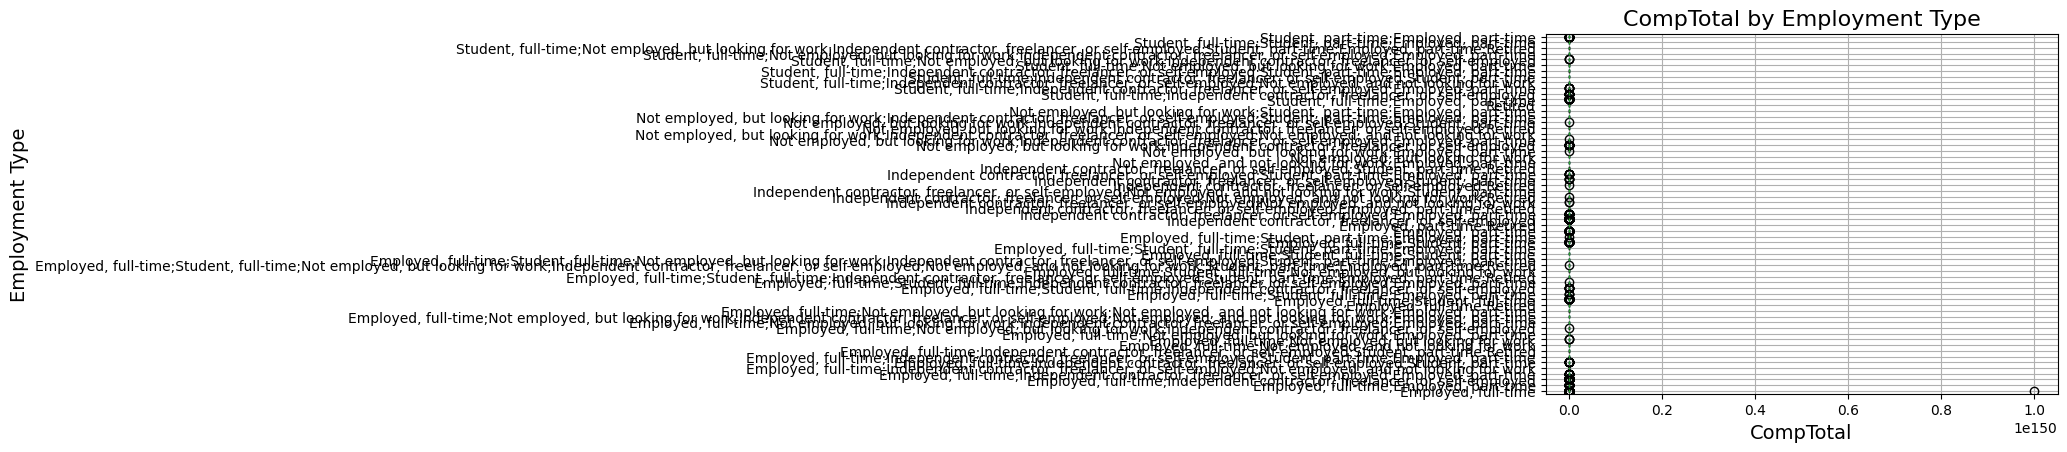

In [26]:
# # your code goes here
# # Task 4.1: Box plot of CompTotal by Employment
# query = "SELECT Employment, CompTotal FROM main WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL"
# df = pd.read_sql_query(query, conn)

# plt.figure(figsize=(12, 36))
# df.boxplot(column='CompTotal', by='Employment', vert=False, patch_artist=True)
# plt.title('CompTotal by Employment Type')
# plt.suptitle('')
# plt.xlabel('CompTotal')
# plt.ylabel('Employment Type')
# # plt.tight_layout()
# plt.show()
query = "SELECT Employment, CompTotal FROM main WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 38))  # Increase the figure size
df.boxplot(column='CompTotal', by='Employment', vert=False, patch_artist=True)

# Title and labels
plt.title('CompTotal by Employment Type', fontsize=16)
plt.suptitle('')  # Removes the default 'boxplot' title
plt.xlabel('CompTotal', fontsize=14)
plt.ylabel('Employment Type', fontsize=14)

# Rotate y-axis labels to avoid overlap
plt.yticks(rotation=0)  # Rotating the y-axis labels (0 for horizontal)

# Adjust layout to avoid clipping of labels
plt.tight_layout(pad=3.0)

# Display the plot
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x2600 with 0 Axes>

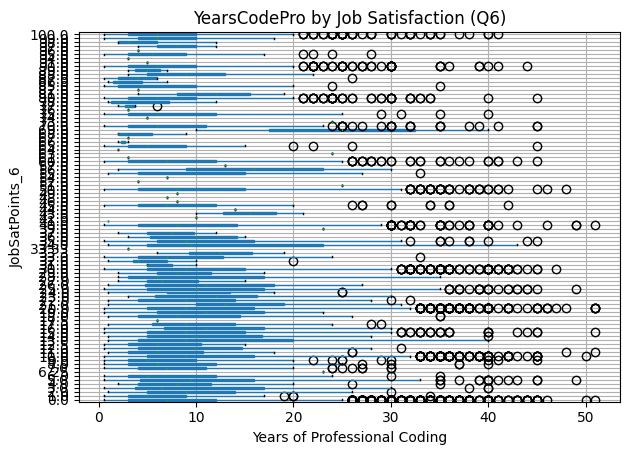

In [31]:
# your code goes here
# Task 4.2: Box plot of YearsCodePro by JobSatPoints_6
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric (some values like 'Less than 1 year', 'More than 50 years')
def convert_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)
df = df.dropna()

plt.figure(figsize=(10, 26))
df.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=False, patch_artist=True)
plt.title('YearsCodePro by Job Satisfaction (Q6)')
plt.suptitle('')
plt.xlabel('Years of Professional Coding')
plt.ylabel('JobSatPoints_6')
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [32]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
